使用我们上节课的数据，然后我们使用逻辑回归算法中的decisin_function来进行调节

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %load ./Scripts/confusion_matrix.py
import numpy as np

# 实现我们的TP
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

def precision(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    return tp / (tp + fp)
    
def recall(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    return tp / (tp + fn)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 进行数据的预处理，解决是二分类的问题
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

# 进行数据集的划分
train_x, test_x, train_y, test_y = train_test_split(X, y)

In [4]:
from Scripts.Logistic import Logistic
log_reg = Logistic()
log_reg.fit(train_x,train_y)
y_predict = log_reg.predict(test_x)

In [5]:
score = sum(y_predict == test_y) / len(test_y)
score  # 此时我们可以看出，算法的准确率为98.4%

0.9644444444444444

In [6]:
confusion_matrix(test_y, y_predict)

array([[387,   5],
       [ 11,  47]])

In [7]:
# 每个点到划分超平面的举例，在我们自己实现逻辑回归中有讲到过
decision_scores = log_reg.decision_function(test_x)
decision_scores[:10]

array([1.16813973e-04, 3.73592015e-16, 7.58296201e-11, 9.98928462e-01,
       1.81807057e-09, 9.99943633e-01, 1.19737190e-04, 2.34172295e-11,
       2.79296978e-02, 1.61756773e-04])

In [8]:
np.min(decision_scores)

5.0699978892399306e-23

In [9]:
np.max(decision_scores)

0.9999996520882644

我们可以通过设置decision_score的值来得到，精准率和召回率的平衡

In [12]:
# 在之前讲的，可能>0.5我们就预测为1， 我们也可以调整成>100，才预测成1
y_predict2 = np.array(decision_scores > 100, dtype='int') 
y_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
confusion_matrix(test_y, y_predict2) # 此时就可以通过混淆矩阵来观察

array([[392,   0],
       [ 58,   0]])

P-R曲线

In [15]:
precisions = []
recalls = []
# 最小值到最大值之间，按间距0.1取值
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
# 不停调整我们的decision_scores
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision(test_y, y_predict))
    recalls.append(recall(test_y, y_predict))

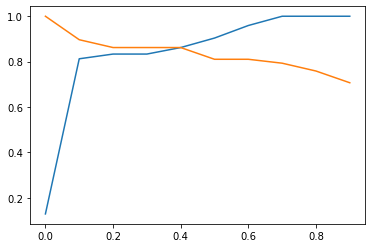

In [16]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

END